In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import NuSVC
from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    f1_score,
    auc,
)


sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [5]:
full_train = pd.read_csv("datasets/train_clean.csv")

to_drop = [
    "Name",
    "Ticket",
    "Embarked",
    "PassengerId",
    *[c for c in full_train if "cabin" in c.lower()],
]

full_train.drop(columns=to_drop, inplace=True)

target_col = "Survived"

X = full_train.drop(target_col, axis=1)
y = full_train[target_col]

X_train, y_train = X, y

model = NuSVC(
    probability=True,
    random_state=42,
    shrinking=True,
    cache_size=1000,
    probability=True,
    break_ties=True,
)

param_grid = {
    "nu": [0.1, 0.3, 0.5, 0.7, 0.9],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4, 5],
    "gamma": ["scale", "auto"],
    "coef0": [0.0, 0.5, 1.0],
}


# Best Parameters: {'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.5}


grid_search = GridSearchCV(
    model, param_grid, n_jobs=1, cv=5, scoring="accuracy", verbose=4
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
# print(f"Accuracy on Test Set: {accuracy:.4f}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 1/5] END break_ties=True, cache_size=1000, coef0=0.0, degree=2, gamma=scale, kernel=linear, nu=0.1, probability=True, shrinking=True;, score=0.433 total time=   0.0s
[CV 2/5] END break_ties=True, cache_size=1000, coef0=0.0, degree=2, gamma=scale, kernel=linear, nu=0.1, probability=True, shrinking=True;, score=0.388 total time=   0.0s
[CV 3/5] END break_ties=True, cache_size=1000, coef0=0.0, degree=2, gamma=scale, kernel=linear, nu=0.1, probability=True, shrinking=True;, score=0.382 total time=   0.0s
[CV 4/5] END break_ties=True, cache_size=1000, coef0=0.0, degree=2, gamma=scale, kernel=linear, nu=0.1, probability=True, shrinking=True;, score=0.320 total time=   0.0s
[CV 5/5] END break_ties=True, cache_size=1000, coef0=0.0, degree=2, gamma=scale, kernel=linear, nu=0.1, probability=True, shrinking=True;, score=0.345 total time=   0.0s
[CV 1/5] END break_ties=True, cache_size=1000, coef0=0.0, degree=2, gamma=scale, kerne

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/li

In [6]:
import joblib

joblib.dump(
    grid_search,
    f"../models/{grid_search.best_estimator_.__class__.__name__}_{grid_search.best_score_ * 100:.4f}.joblib",
)

['models/NuSVC_82.1171.joblib']

In [7]:
model_name = grid_search.estimator.__class__.__name__

get_best = True  # get the best model or the latest model

# get files in models sorted by last modified
if get_best:
    import os
    import re

    files = os.listdir("../models")
    files = [f for f in files if re.match(f"{model_name}_.*\.joblib", f)]
    files = sorted(
        files, key=lambda x: re.search(r"_(\d+\.\d+)\.joblib", x).group(1), reverse=True
    )
    file_name = files[0]
else:
    import os
    import re

    files = os.listdir("../models")
    files = [f for f in files if re.match(f"{model_name}_.*\.joblib", f)]
    files = sorted(
        files, key=lambda x: os.path.getmtime(os.path.join("models", x)), reverse=True
    )
    file_name = files[0]
loaded_grid_search = joblib.load(f"../models/{file_name}")

In [8]:
for k, v in loaded_grid_search.cv_results_.items():
    print(k, v, sep="\t")

mean_fit_time	[2.09539413e-02 3.29627991e-02 3.90676022e-02 3.92002106e-02
 1.75666809e-03 6.43489838e-02 1.18279743e-01 4.06281471e-02
 4.34955120e-02 1.58600807e-03 5.78514099e-02 8.37932110e-02
 5.65509796e-02 6.35890007e-02 1.44963264e-03 1.79032803e-02
 4.02827740e-02 5.52803516e-02 6.31230831e-02 1.55124664e-03
 1.79805756e-02 3.16610336e-02 3.86437893e-02 3.88964176e-02
 1.44081116e-03 9.60519314e-02 1.84709644e-01 3.98143291e-02
 4.25057888e-02 1.39698982e-03 6.58238411e-02 7.78017998e-02
 5.65947533e-02 6.35421276e-02 1.39694214e-03 2.12798595e-02
 5.05470276e-02 7.10765839e-02 8.43573570e-02 1.38158798e-03
 1.81201935e-02 3.15292358e-02 3.85499477e-02 3.84409428e-02
 1.49135590e-03 1.59295130e-01 2.62873840e-01 3.95097733e-02
 4.22578812e-02 1.52373314e-03 5.76003075e-02 8.33163261e-02
 5.62981129e-02 6.37105465e-02 1.41320229e-03 1.78121090e-02
 4.02203560e-02 5.49279690e-02 6.31509781e-02 1.60226822e-03
 1.80499077e-02 3.16000462e-02 3.85302544e-02 3.84074211e-02
 1.4288425

In [9]:
real_test = pd.read_csv("datasets/test_clean.csv")

In [10]:
real_test.drop(columns=list(set(to_drop) - {"PassengerId"}), inplace=True)

In [11]:
pred = pd.DataFrame(best_model.predict(real_test.drop(columns=["PassengerId"]))).rename(
    columns={0: "Survived"}
)

In [12]:
# get probabilities
probs = best_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# predict class values
yhat = best_model.predict(X_train)

# calculate roc-auc score
lr_auc = roc_auc_score(y_train, probs)

# calculate roc curve
ns_fpr, ns_tpr, _ = roc_curve(y_train, probs)

# get f1 score
lr_f1 = f1_score(y_train, best_model.predict(X_train))

# get auc score
lr_auc = auc(ns_fpr, ns_tpr)

# get precision & recall
lr_precision, lr_recall, _ = precision_recall_curve(y_train, probs)

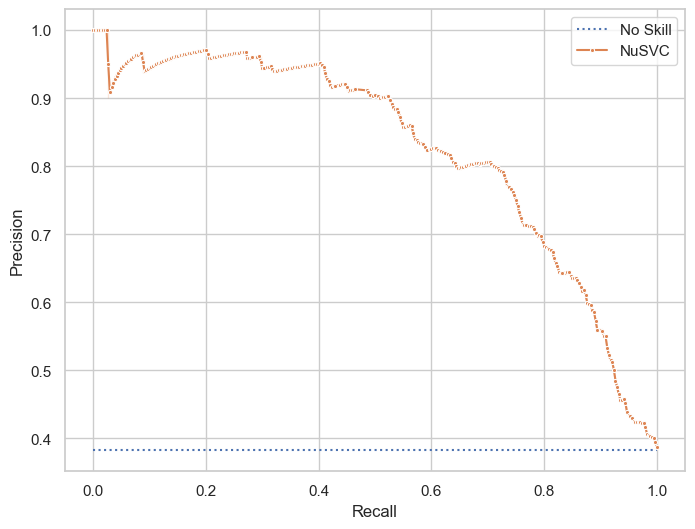

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get no-skill line
no_skill = len(y_train[y_train == 1]) / len(y_train)

# Set the style
sns.set(style="whitegrid")

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))
sns.lineplot(x=[0, 1], y=[no_skill, no_skill], linestyle="dotted", label="No Skill")
sns.lineplot(x=lr_recall, y=lr_precision, marker=".", label=model_name)

# Set axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()

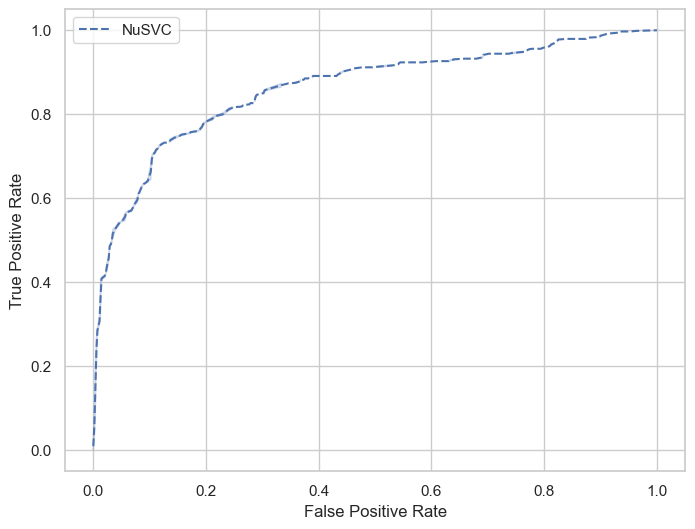

In [14]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=ns_fpr, y=ns_tpr, linestyle="--", label=model_name)

# Set axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [15]:
pd.concat([real_test[["PassengerId"]], pred], axis=1).to_csv(
    f"../outs/{best_model.__class__.__name__}_{grid_search.best_score_ * 100:.4f}.csv",
    index=False,
)